In [1]:
from PIL import Image
import os
from IPython.display import display

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline

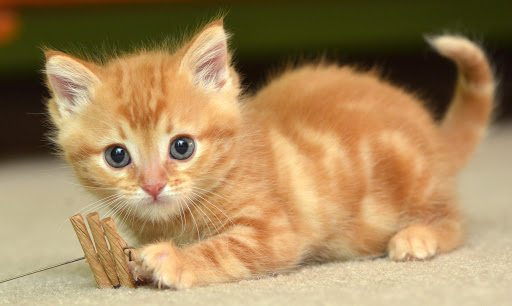

In [2]:
Image.open(fp = r"C:\Users\bishw\OneDrive\Desktop\iNeuron_CV_NLP_Masters\CNN\dogcat_new\cat.jpg")

In [3]:
path = r"D:\PyTorch for Deep Learning with Python Bootcamp\1. Course Overview, Installs, and Setup\PYTORCH_NOTEBOOKS\Images\CATS_DOGS\train\CAT"

In [4]:
img_name = []
for f,sub_f, fl_name in os.walk(path):
    for img in fl_name:
        img_name.append(f+'\\'+img)

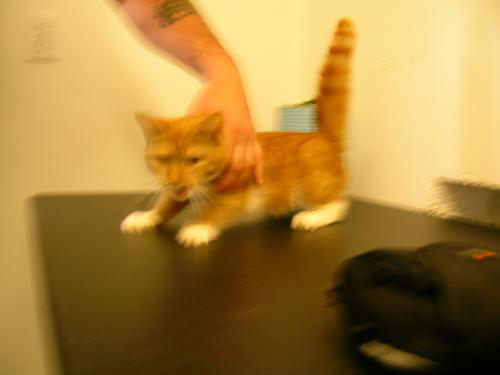

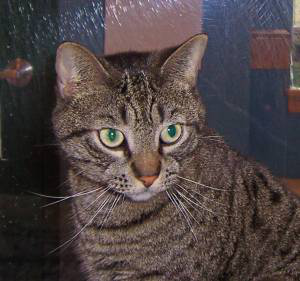

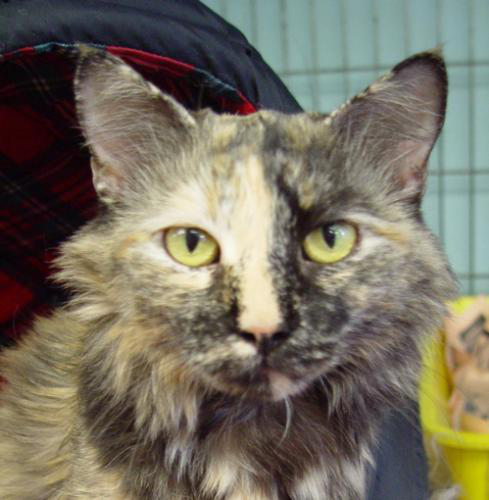

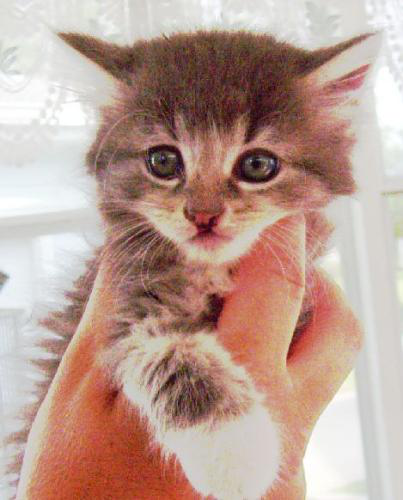

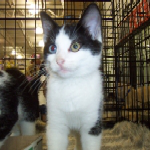

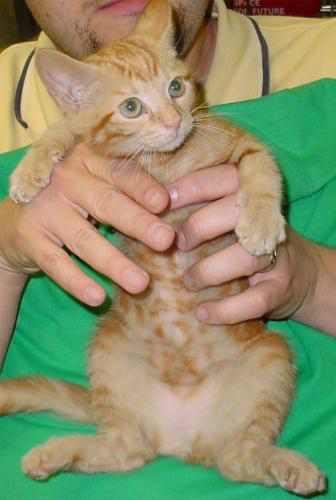

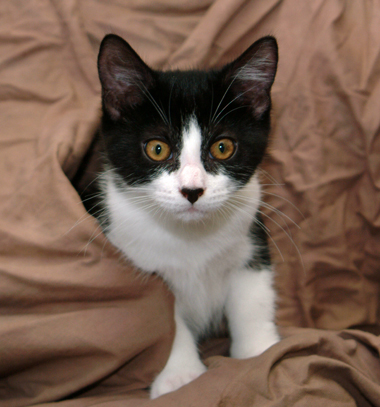

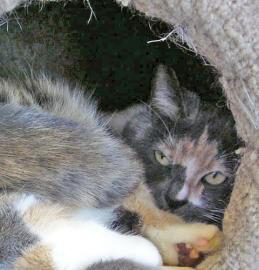

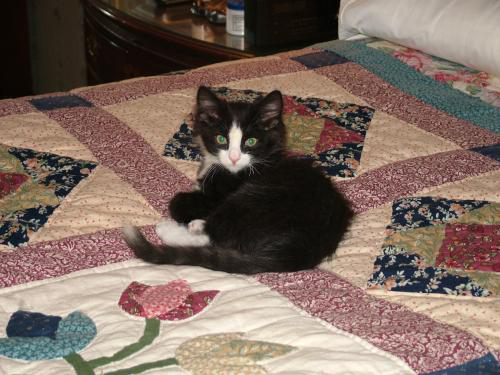

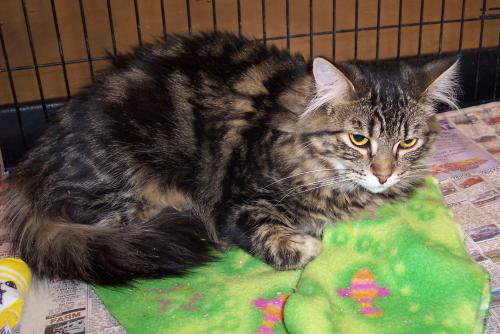

In [5]:
for i in img_name[:10]:
    with Image.open(i) as im:
        display(im)

In [6]:
img_size = []
for i in img_name:
    try:
        with Image.open(i) as im:
            img_size.append(im.size)
    except Exception as e:
        print(e)

In [7]:
ht = []
width = []
for l,b in img_size:
    ht.append(l)
    width.append(b)

In [8]:
from statistics import mean, median

In [9]:
print(f"Avg height of img is {mean(ht)} and avg width is {mean(width)}")

Avg height of img is 410.73300608259524 and avg width is 357.04268487888163


In [10]:
print(f"Avg height of img is {median(ht)} and avg width is {median(width)}")

Avg height of img is 470 and avg width is 375


In [11]:
import matplotlib.pyplot as plt


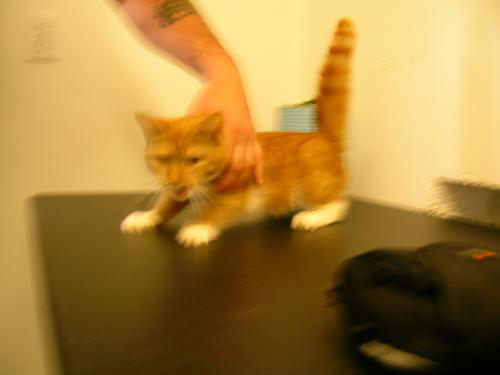

In [12]:
cat = Image.open(img_name[0])
cat

In [ ]:
im[14,12,:] # ToTensor auto normalizes the img by using min max scaler x / 255 but sometimes we need to use some standard mean and std when using pretrained models

torch.Size([3, 112, 112])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


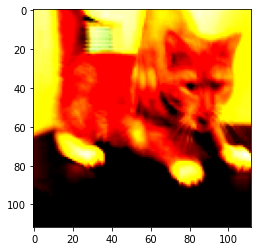

In [13]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean = [0.485,0.456,0.406], std = [0.229,0.224,0.225]), # for each specific channel
                                transforms.Resize((224,224)),
                                transforms.CenterCrop((112,112)),
                               transforms.RandomHorizontalFlip(p = 0.5),
                               transforms.RandomRotation(degrees=30)]) # 50% the img will be flipped horizontally,])

im = transform(cat)
print(im.shape) # channel, length, width
plt.imshow( np.transpose(im.numpy(), (1,2,0)));

IndexError: index 14 is out of bounds for dimension 0 with size 3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 112, 112])


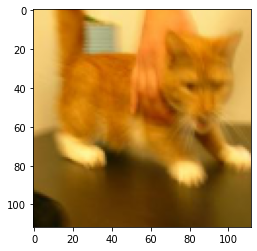

In [15]:
inv_normalize = transforms.Compose([transforms.Normalize(mean= [-0.485/0.229,-0.456/0.224,-0.406/0.225], std = [1/0.229,1/0.224,1/0.225])])
im = inv_normalize(im)
print(im.shape) # channel, length, width
plt.imshow(np.transpose(im.numpy(), (1,2,0)));

# MAIN CODE STARTS HERE

In [16]:
train_transform = transforms.Compose([transforms.RandomRotation(degrees=10),
                                       transforms.RandomHorizontalFlip(p = 0.5),
                                       transforms.Resize((224,224)),
                                      transforms.CenterCrop((224,224)),
                                      transforms.ToTensor(), 
                                      transforms.Normalize(mean = [0.485,0.456,0.406], std = [0.229,0.224,0.225])])

In [17]:
test_transform = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.CenterCrop((224,224)),
                                      transforms.ToTensor(), 
                                      transforms.Normalize(mean = [0.485,0.456,0.406], std = [0.229,0.224,0.225])])

In [18]:
root = r"D:\PyTorch for Deep Learning with Python Bootcamp\1. Course Overview, Installs, and Setup\PYTORCH_NOTEBOOKS\Images\CATS_DOGS"

In [32]:
torch.manual_seed(1429)
train_data = datasets.ImageFolder(os.path.join(root, 'train'), transform = train_transform)
test_data = datasets.ImageFolder(os.path.join(root, 'test'), transform = test_transform)
train_loader = DataLoader(train_data,batch_size = 10, shuffle = True)
test_loader = DataLoader(test_data,batch_size = 10, shuffle = False)
class_names = train_data.classes

In [33]:
for img, lbl in train_loader:
    break

In [34]:
img.shape

torch.Size([10, 3, 224, 224])

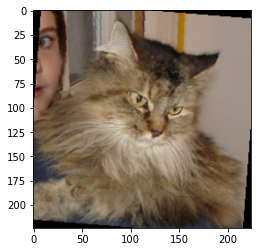

In [35]:
inv_normalize = transforms.Compose([transforms.Normalize(mean= [-0.485/0.229,-0.456/0.224,-0.406/0.225], std = [1/0.229,1/0.224,1/0.225])])
im = inv_normalize(img[5])
plt.imshow(np.transpose((im.numpy()), (1,2,0)))

# Model

In [36]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1) #out_channel = no of filters, kernel_size = filter dim 
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, stride=1)
        self.fc1 = nn.Linear(54*54*16,120) # out_channels from conv1, in/out_channel from conv2
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,2) # output as 10 classes
        
    def forward(self,X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.view(-1,54*54*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim = 1)

In [37]:
(((((((((224-3)+1)-2)//2)+1)-3)+1)-2)//2)+1

54

In [38]:
torch.manual_seed(1429)
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

In [39]:
model

CNN(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=46656, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

In [40]:
for param in model.parameters():

    print(param.numel())


162
6
864
16
5598720
120
10080
84
168
2


In [41]:
epochs = 10
train_loss = []
test_loss = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    test_corr = 0
    
    
    for batch, (X_train, y_train) in enumerate(train_loader):
        batch = batch+1
        y_pred = model(X_train)
        losses = criterion(y_pred,y_train)
        pred = torch.max(y_pred.data,1)[1]
        
        batch_corr = (pred == y_train).sum() # True 1 / False 0
        
        trn_corr = trn_corr+batch_corr
         
        optimizer.zero_grad()
        losses.backward()
        optimizer.step()
        
        if batch%600 == 0:
            print(f'Epoch {i} batch {batch} and loss {losses} and accuracy is {trn_corr.item()*100/(10*batch)}%')
    train_loss.append(losses)
    train_correct.append(trn_corr)
    
    with torch.no_grad():
        for batch, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test)
            
            predicted = torch.max(y_val.data,1)[1]
            
            test_corr = test_corr + (predicted == y_test).sum()
        losses = criterion(y_val, y_test)
        test_loss.append(losses)
        test_correct.append(test_corr)

Epoch 0 batch 600 and loss 0.5214215517044067 and accuracy is 61.9%
Epoch 0 batch 1200 and loss 0.7931746244430542 and accuracy is 65.90833333333333%
Epoch 0 batch 1800 and loss 0.5589828491210938 and accuracy is 68.21111111111111%
Epoch 1 batch 600 and loss 0.518271803855896 and accuracy is 75.51666666666667%
Epoch 1 batch 1200 and loss 0.6144134998321533 and accuracy is 76.03333333333333%
Epoch 1 batch 1800 and loss 0.40222135186195374 and accuracy is 76.37222222222222%
Epoch 2 batch 600 and loss 0.3116895258426666 and accuracy is 78.36666666666666%
Epoch 2 batch 1200 and loss 0.3638218343257904 and accuracy is 79.39166666666667%
Epoch 2 batch 1800 and loss 0.6079236268997192 and accuracy is 79.38888888888889%
Epoch 3 batch 600 and loss 0.26398196816444397 and accuracy is 80.03333333333333%
Epoch 3 batch 1200 and loss 0.4576601982116699 and accuracy is 80.83333333333333%
Epoch 3 batch 1800 and loss 0.15605348348617554 and accuracy is 80.84444444444445%
Epoch 4 batch 600 and loss 0.66

In [42]:
torch.save(model.state_dict(),"CustomCNN_Cats_Dogs.pt")

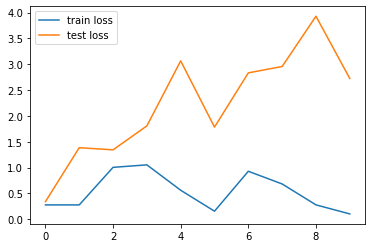

In [47]:
plt.plot(train_loss,label = 'train loss')
plt.plot(test_loss,label = 'test loss')
plt.legend();

In [66]:
test_data

Dataset ImageFolder
    Number of datapoints: 6251
    Root location: D:\PyTorch for Deep Learning with Python Bootcamp\1. Course Overview, Installs, and Setup\PYTORCH_NOTEBOOKS\Images\CATS_DOGS\test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

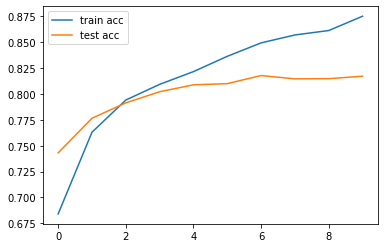

In [71]:
plt.plot([t/18743 for t in train_correct], label = 'train acc')
plt.plot([t/6251 for t in test_correct], label = 'test acc')
plt.legend();